# **Lista de Exercícios 01 - Processamento Digital de Imagens**

#### **Alunos:** Elias Faria Silva (2018127254), Giovanni Martins de Sá Júnior (2017001850)

Nesta primeira lista de exercícios, serão executadas algumas técnicas de processamento sobre uma imagem em escala de cinza, focando em fazer análises do realce obtidas pela imagem. Nesse sentido, serão discutidas as implementações feitas em termos dos resultados obtidos pela técnica empregada.

**Observação:** Nesta lista de Exercícios, foram utilizadas duas bibliotecas para duas funções distintas. Dentro biblioteca **Image**, foi utilizado alguns recursos do módulo **PIL**, que permitiu a execução de algumas tarefas, como a importação das imagens e reajuste da resolução das imagens, mas também a obtenção/atribuição dos/aos valores armezanados nos pixels das imagens, dentro das funções desenvolvidas, tal como foi executado no **Exercício Zero**. Essas duas manipulações são vistas com os parâmetros **getpixel** e **putpixel**.

## Importação da Base de Imagens utilizada

Abaixo, como pode ser visto, é executada a importação das bibliotecas mencionadas na observação anterior, bem como das três imagens da base de dados utilizada para este exercício. Para fins de padronização, as imagens foram reajustadas para que ficassem todas na mesma resolução.

In [4]:
from PIL import Image
from IPython.display import display

#### Imagem 01

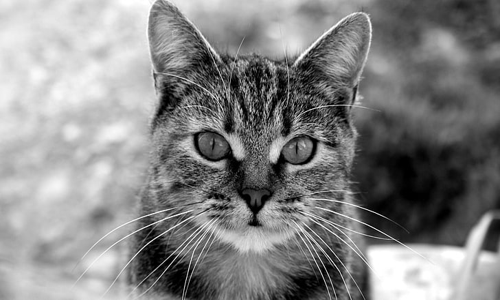

In [39]:
caminho_da_imagem_1 = 'C:\Projetos\Trabalhos-Faculdade\Processamento Digital de Imagens\Listas\Lista 1/gato.jpg'
imagem_1 = Image.open(caminho_da_imagem_1)
imagem_1 = imagem_1.resize((500, 300))
display(imagem_1)

#### Imagem 02

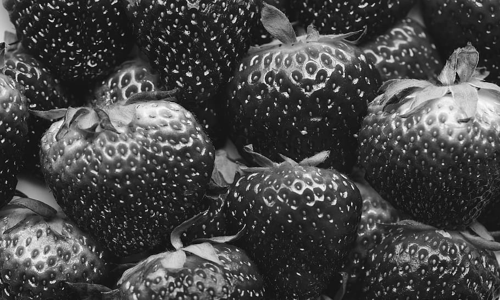

In [40]:
caminho_da_imagem_2 = 'C:\Projetos\Trabalhos-Faculdade\Processamento Digital de Imagens\Listas\Lista 1/morango.jpg'
imagem_2 = Image.open(caminho_da_imagem_2)
imagem_2 = imagem_2.resize((500, 300))
display(imagem_2)

#### Imagem 03

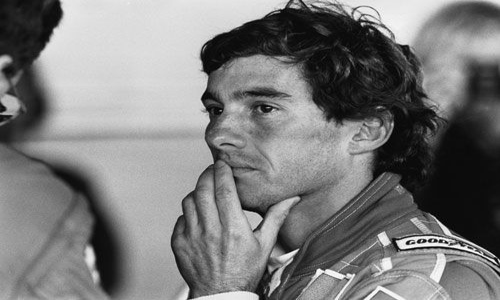

In [41]:
caminho_da_imagem_3 = 'C:\Projetos\Trabalhos-Faculdade\Processamento Digital de Imagens\Listas\Lista 1/senna.jpg'
imagem_3 = Image.open(caminho_da_imagem_3)
imagem_3 = imagem_3.resize((500, 300))
display(imagem_3)

## 1. Cálculo do negativo (s=L-1-r)

A implementação da função do negativo irá executar a inversão dos valores da intensidade de cor em relação a um valor máximo, costumeiramente sendo 255 para imagens de 8 bits por canal. Na função implementada, ela irá receber por parâmetro a imagem a ser aplicada pela técnica e então executado a operação de negativo sobre cada pixel da imagem.

Acerca da implementação, ela irá receber a imagem como parâmetro, e então será efetuado um loop que percorre cada pixel da imagem e então efetuando a subtração **novo_pixel = 255 - pixel_original**. Com isso, regiões escuras das fotos passaram a ter um realce claro, e vice-versa. Mais abaixo, são apresentados os resultados obtidos.

In [45]:
# QUESTAO 1
def calcular_negativo(imagem):
    largura, altura = imagem.size
    nova_imagem = Image.new("RGB", (largura, altura))

    for x in range(largura):
        for y in range(altura):
            # Obtem o valor do pixel original
            pixel_original = imagem.getpixel((x, y))

            if isinstance(pixel_original, tuple):  # Verifique se é uma imagem colorida
                # Calcule o negativo para cada canal de cor
                novo_pixel = tuple([255 - valor for valor in pixel_original])
            else:  # Se for em escala de cinza
                novo_pixel = 255 - pixel_original

            # Atribui o novo valor do pixel na imagem
            nova_imagem.putpixel((x, y), novo_pixel)

    return nova_imagem

In [43]:
# Calcula o negativo da imagem
imagem_negativa_1 = calcular_negativo(imagem_1)
imagem_negativa_2 = calcular_negativo(imagem_2)
imagem_negativa_3 = calcular_negativo(imagem_3)

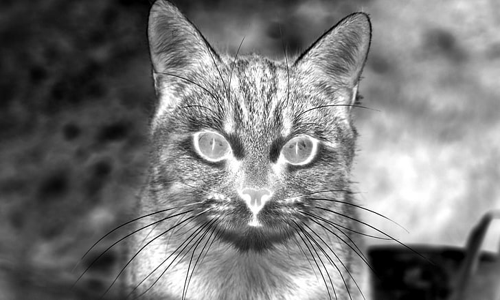

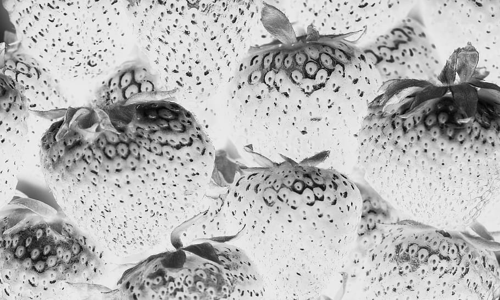

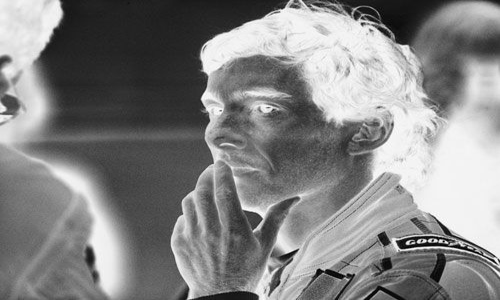

In [46]:
# Visualização
display(imagem_negativa_1)
display(imagem_negativa_2)
display(imagem_negativa_3)

## 2. Cálculo da transformação logarítmica

A aplicação da transformação logarítmica, é definida por ser um método de processamento no qual a imagem será mapeada com os valores de intensidade dos pixels, com o intuito de executar um realce em áreas escuras da imagem. Nesse sentido a **constante c** terá um papel direto nesse processo, uma vez que quanto maior esse valor, mais intensa será essa transformação. Ou seja, quanto maior o valor da constante c, maior será o **contraste entre a região clara e escura**.

Assim a implementação feita foi divida em duas funções. A primeira delas, **_log(x)**, irá calcular o logaritmo na base 2 de um valor X, e retornar o número de vezes que x pode ser dividido por 2 até atingir/ultrapassar o valor de 256. Assim essa função será incorporada a função de **transformação logarítmica**, e junto da constante c, é aplicado o método sobre cada pixel da imagem.

Assim como era esperado, percebe-se que o aumento do valor da **constante c** provoca o **aumento do contraste da imagem**.

In [48]:
# QUESTAO 2

def _log(x):
    if x == 0:
        return 0  # Evita a divisão por zero no logaritmo
    n = 0
    while x < 256:
        x *= 2
        n += 1
    return n

def transformacao_logaritmica(imagem, constante_c):
    largura, altura = imagem.size
    nova_imagem = Image.new("RGB", (largura, altura))

    for x in range(largura):
        for y in range(altura):
            # Obtem o valor original do pixel
            pixel_original = imagem.getpixel((x, y))

            # Aplica a transformação logarítmica a cada canal de cor
            novo_pixel = tuple([int(constante_c * _log(1 + canal)) for canal in pixel_original])

            # Normaliza os valores para o intervalo de 0 a 255
            novo_pixel = tuple([min(255, max(0, valor)) for valor in novo_pixel])

            # Armazena o novo valor do pixel na imagem
            nova_imagem.putpixel((x, y), novo_pixel)

    return nova_imagem

#### C = 10

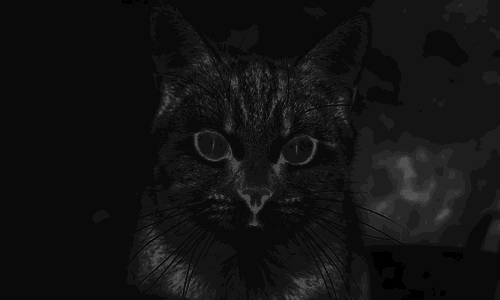

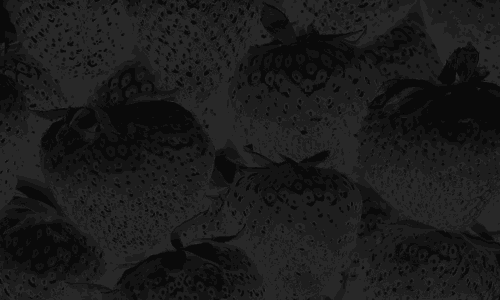

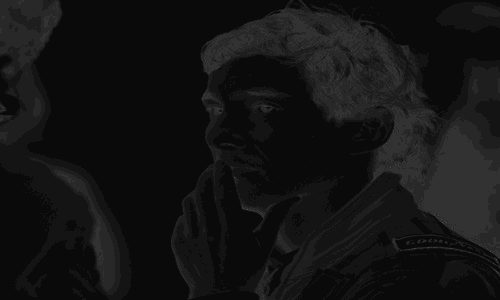

In [49]:
# C = 10

constante_c = 10
# Aplica a transformação logarítmica
imagem_transformada_1 = transformacao_logaritmica(imagem_1, constante_c)
imagem_transformada_2 = transformacao_logaritmica(imagem_2, constante_c)
imagem_transformada_3 = transformacao_logaritmica(imagem_3, constante_c)

display(imagem_transformada_1)
display(imagem_transformada_2)
display(imagem_transformada_3)

#### C = 25

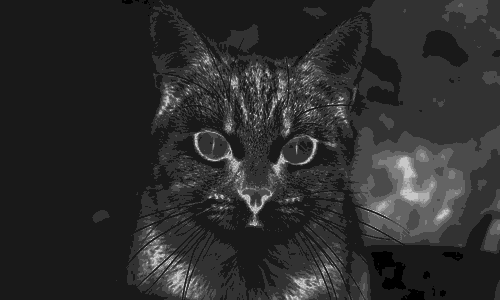

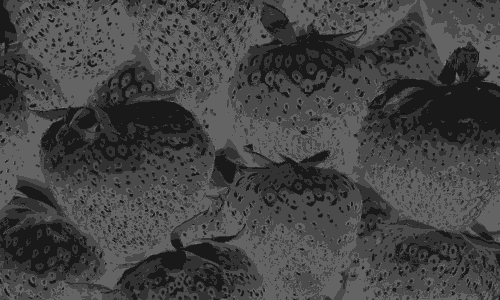

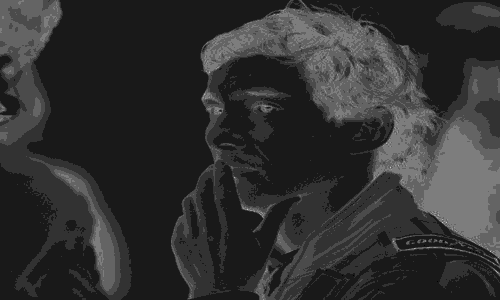

In [50]:
# C = 25

constante_c = 25
# Aplica a transformação logarítmica
imagem_transformada_1 = transformacao_logaritmica(imagem_1, constante_c)
imagem_transformada_2 = transformacao_logaritmica(imagem_2, constante_c)
imagem_transformada_3 = transformacao_logaritmica(imagem_3, constante_c)

display(imagem_transformada_1)
display(imagem_transformada_2)
display(imagem_transformada_3)

#### C = 80

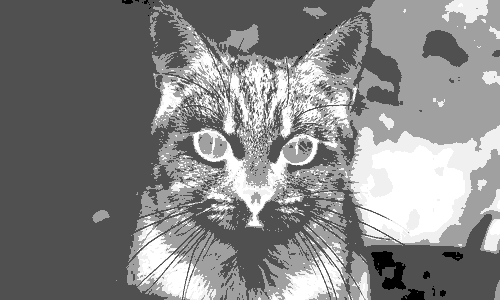

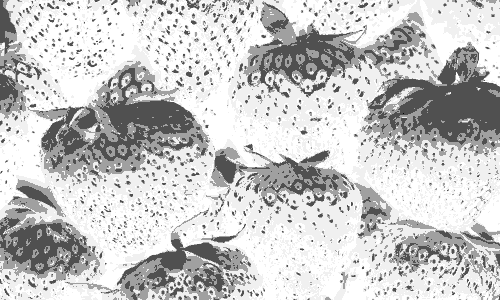

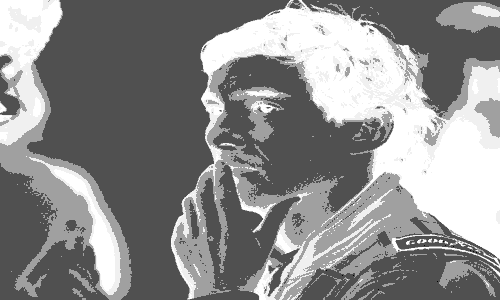

In [51]:
# C = 80

constante_c = 80
# Aplica a transformação logarítmica
imagem_transformada_1 = transformacao_logaritmica(imagem_1, constante_c)
imagem_transformada_2 = transformacao_logaritmica(imagem_2, constante_c)
imagem_transformada_3 = transformacao_logaritmica(imagem_3, constante_c)

display(imagem_transformada_1)
display(imagem_transformada_2)
display(imagem_transformada_3)

## 3. Cálculo da transformação de potência

A função de transformação de potência é um método de processamento que ajusta a intensidade dos pixels, controlando o contraste de diferentes partes da imagem. Com isso, duas variáveis terão uma participação muito direta nesta implmentação, sendo elas a **constante c**, assim como na implementação anterior, e o **gamma**.

Como pode ser visto, fixando-se o valor de gama em 1, a **variação da constante c**, provocou um aumento de contraste considerável neste método. Neste caso, a constante c tem **influência exponencial** na implementação do método de forma que um pequeno aumento já induz em uma mudança muito brusca nos resultados, como pode ser visto mais abaixo:

In [53]:
# QUESTÃO 3

def transformacao_potencia(imagem, constante_c, gamma):
    largura, altura = imagem.size
    nova_imagem = Image.new("RGB", (largura, altura))

    for x in range(largura):
        for y in range(altura):
            # Obtem o valor do pixel original
            pixel_original = imagem.getpixel((x, y))

            # Aplica a transformação de potência a cada canal de cor
            novo_pixel = tuple([int(constante_c * (canal ** gamma)) for canal in pixel_original])

            # Normaliza os valores para o intervalo de 0 a 255
            novo_pixel = tuple([min(255, max(0, valor)) for valor in novo_pixel])

            # Atribui o novo pixel à nova imagem
            nova_imagem.putpixel((x, y), novo_pixel)

    return nova_imagem

#### C = 1

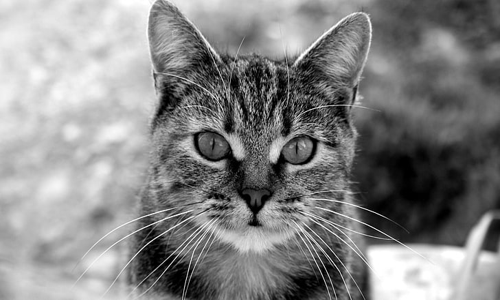

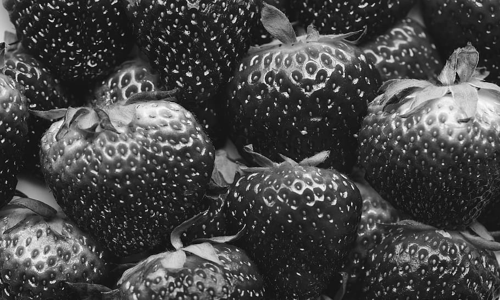

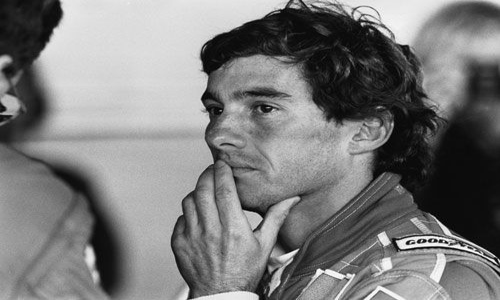

In [59]:
# Define as constantes para a transformação de potência
constante_c = 1
gamma = 1

# Aplica a transformação de potência
imagem_transformada_1 = transformacao_potencia(imagem_1, constante_c, gamma)
imagem_transformada_2 = transformacao_potencia(imagem_2, constante_c, gamma)
imagem_transformada_3 = transformacao_potencia(imagem_3, constante_c, gamma)

display(imagem_transformada_1)
display(imagem_transformada_2)
display(imagem_transformada_3)

#### C = 5

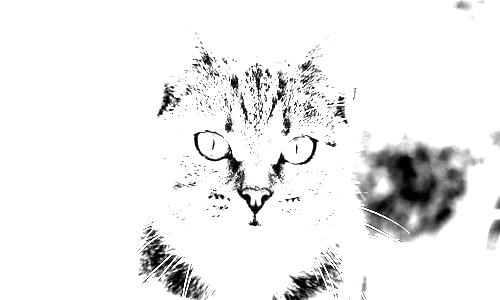

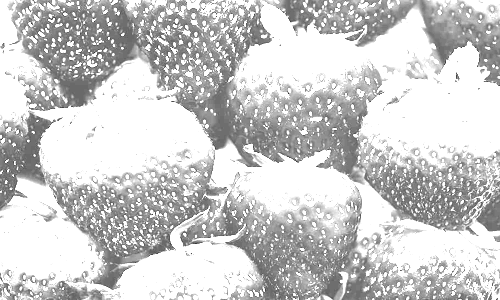

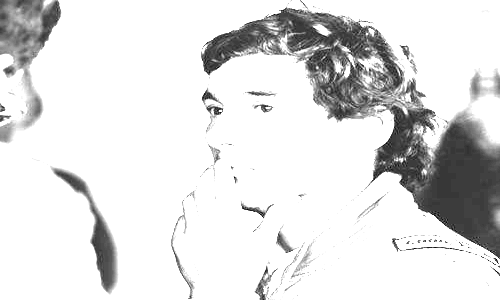

In [60]:
# Define as constantes para a transformação de potência
constante_c = 5
gamma = 1

# Aplica a transformação de potência
imagem_transformada_1 = transformacao_potencia(imagem_1, constante_c, gamma)
imagem_transformada_2 = transformacao_potencia(imagem_2, constante_c, gamma)
imagem_transformada_3 = transformacao_potencia(imagem_3, constante_c, gamma)

display(imagem_transformada_1)
display(imagem_transformada_2)
display(imagem_transformada_3)

#### C = 10

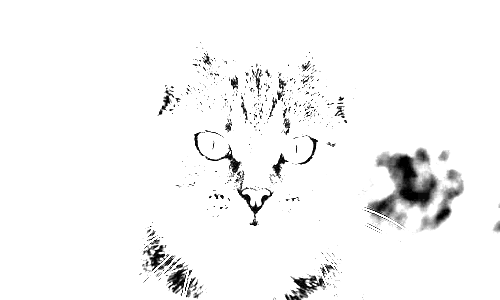

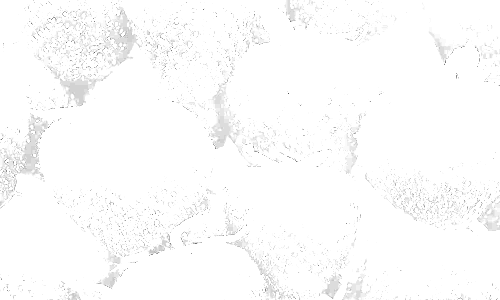

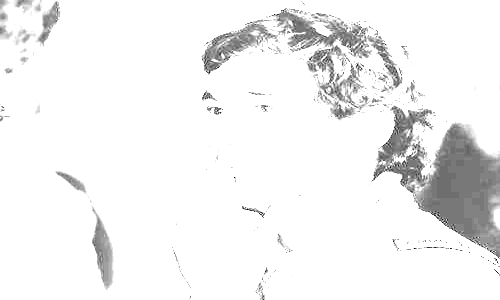

In [62]:
# Define as constantes para a transformação de potência
constante_c = 10
gamma = 1

# Aplica a transformação de potência
imagem_transformada_1 = transformacao_potencia(imagem_1, constante_c, gamma)
imagem_transformada_2 = transformacao_potencia(imagem_2, constante_c, gamma)
imagem_transformada_3 = transformacao_potencia(imagem_3, constante_c, gamma)

display(imagem_transformada_1)
display(imagem_transformada_2)
display(imagem_transformada_3)

## 4. Curva genérica de transformação

Para a implementação com base na curva genérica de transformação em sala, foi criada uma função denominada **transformação_personalizada** que executa uma transformação de intensidade de pixel genérica, mapeando o valor de pixel original para um novo valor, usando uma curva personalizada. Além dela, a função **aplicar_transformação** irá processar a imagem para a escala de cinza.

Para isso, as variáveis r1, s1, r2, s2 terão uma função estratégica nesta implementação. Para **r1** e **r2** representam respectivamente, o ponto de origem na escala de intensidade de pixel onde a transformação começa e o ponto de transição entre os dois segmentos da transformação. Já para **s1** e **s2**, o primeiro define a inclinação da curva no segmento inicial da transformação, e o segundo define a inclinação da curva no segmento final da transformação. 

Para fins de teste, **s1** e **s2** foram fixados em 0 e L-1 (255), respectivamente. Já os parâmetros **r1** e **r2**, foram variados três vezes, formando paras de (50, 150), (30, 100), (70, 200). Dependendo dos valores a transição irá ocorrer com maior ou menor intensidade, como é visto nos resultados obtidos.

In [66]:
# QUESTÃO 4

def transformacao_personalizada(pixel, r1, s1, r2, s2):
    if pixel < r1:
        return 0
    elif r1 <= pixel <= r2:
        return int((s1 * (r2 - pixel) + s2 * (pixel - r1)) / (r2 - r1))
    else:
        return 255

def aplicar_transformacao(imagem, r1, s1, r2, s2):
    largura, altura = imagem.size
    imagem = imagem.convert("L")  # Converte para escala de cinza

    nova_imagem = Image.new("L", (largura, altura))

    for x in range(largura):
        for y in range(altura):
            pixel_original = imagem.getpixel((x, y))
            novo_pixel = transformacao_personalizada(pixel_original, r1, s1, r2, s2)
            nova_imagem.putpixel((x, y), novo_pixel)

    return nova_imagem

#### r1 = 50 e r2 = 150

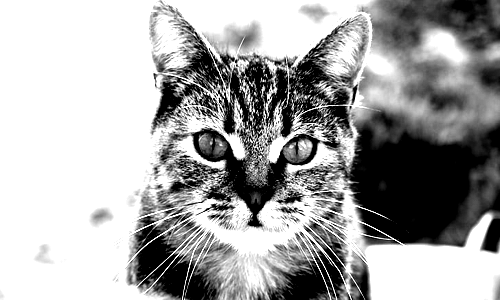

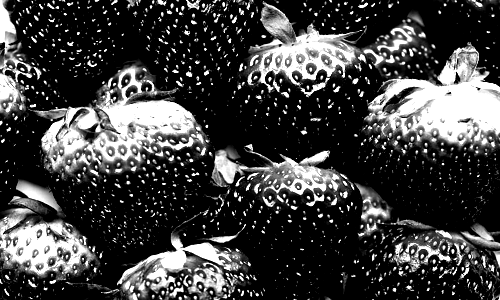

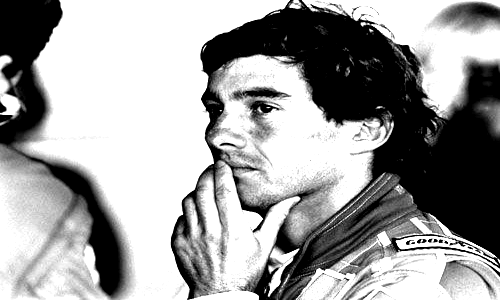

In [67]:
rmin, rmax = 50, 150
s1, s2 = 0, 255

# Aplica a transformação de contraste
imagem_alargada_1 = aplicar_transformacao(imagem_1, rmin, s1, rmax, s2)
imagem_alargada_2 = aplicar_transformacao(imagem_2, rmin, s1, rmax, s2)
imagem_alargada_3 = aplicar_transformacao(imagem_3, rmin, s1, rmax, s2)

display(imagem_alargada_1)
display(imagem_alargada_2)
display(imagem_alargada_3)

#### r1 = 30 e r2 = 100

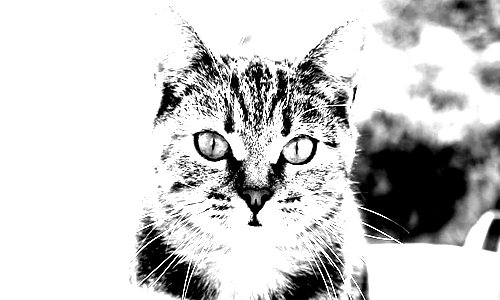

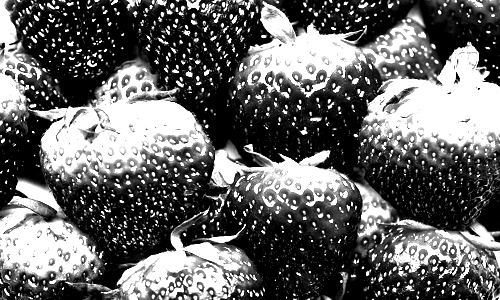

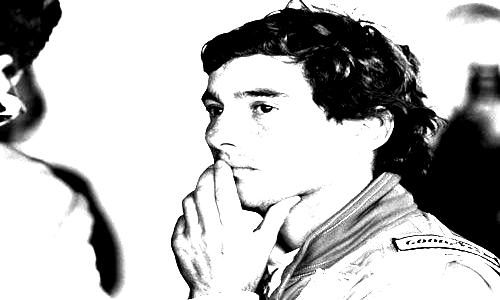

In [68]:
rmin, rmax = 30, 100
s1, s2 = 0, 255

# Aplica a transformação de contraste
imagem_alargada_1 = aplicar_transformacao(imagem_1, rmin, s1, rmax, s2)
imagem_alargada_2 = aplicar_transformacao(imagem_2, rmin, s1, rmax, s2)
imagem_alargada_3 = aplicar_transformacao(imagem_3, rmin, s1, rmax, s2)

display(imagem_alargada_1)
display(imagem_alargada_2)
display(imagem_alargada_3)

#### r1 = 70 e r2 = 200

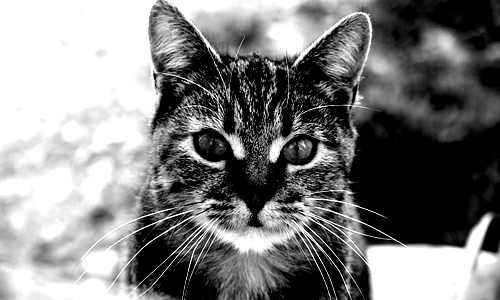

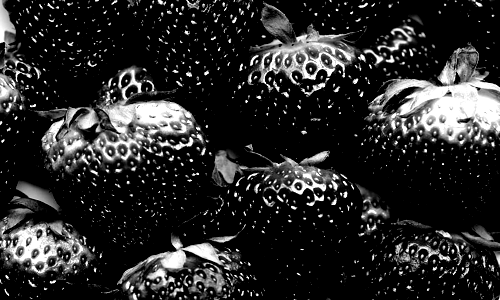

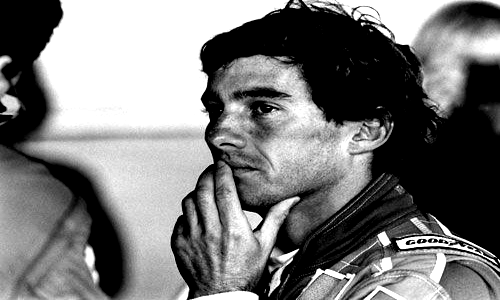

In [69]:
rmin, rmax = 70, 200
s1, s2 = 0, 255

# Aplica a transformação de contraste
imagem_alargada_1 = aplicar_transformacao(imagem_1, rmin, s1, rmax, s2)
imagem_alargada_2 = aplicar_transformacao(imagem_2, rmin, s1, rmax, s2)
imagem_alargada_3 = aplicar_transformacao(imagem_3, rmin, s1, rmax, s2)

display(imagem_alargada_1)
display(imagem_alargada_2)
display(imagem_alargada_3)

## 5. Função 05 (Não funcionou)

In [83]:
def alteracao_pixel_especifico(imagem, a, b, max_valor, min_valor):
    # Normaliza os valores dos pixels para o intervalo [0, 1]
    imagem_normalizada = imagem.convert("L").point(lambda p: p / 255.0)

    # Aplica a alteração apenas nos pixels com o valor dentro do intervalo [a, b]
    imagem_alterada = Image.eval(imagem_normalizada, lambda p: max_valor if a <= p <= b else min_valor)

    # Reescala os valores para o intervalo [0, 255]
    imagem_alterada = Image.eval(imagem_alterada, lambda p: int(p * 255))

    return imagem_alterada

# Função para exibir imagens original e transformada
def exibir_comparacao(imagem_original, imagem_transformada):
    display(imagem_original)
    display(imagem_transformada)

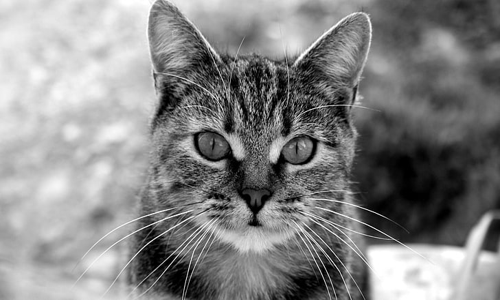

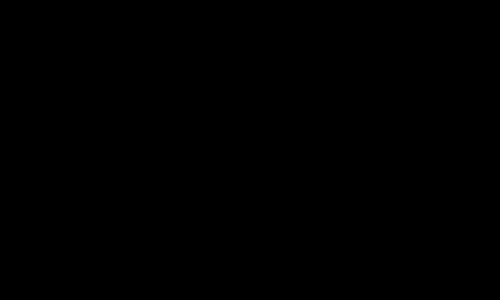

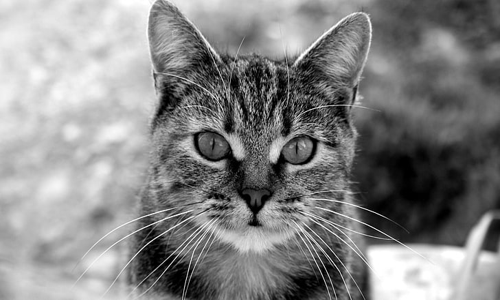

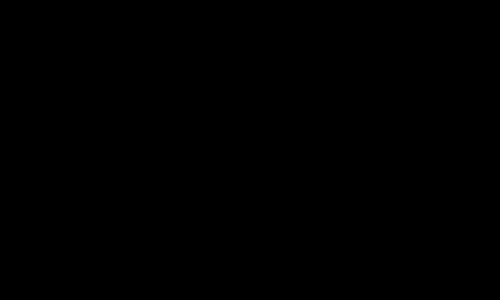

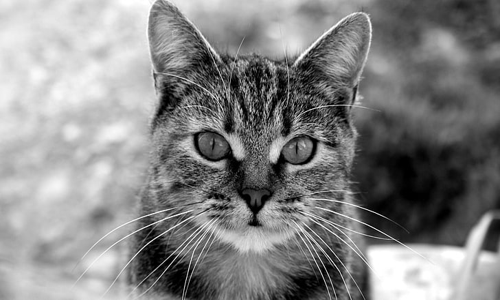

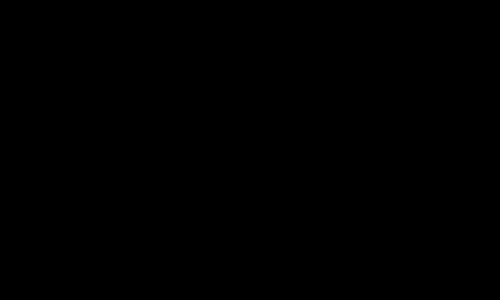

In [84]:
# Valores diferentes para a e b
valores_a = [50, 100, 150]
valores_b = [120, 180, 220]

# Novos valores para os pixels dentro dos diferentes intervalos [a, b]
max_valor = 255
min_valor = 0

# Exibe as comparações para diferentes valores de a e b
for i in range(len(valores_a)):
    a = valores_a[i] / 255.0
    b = valores_b[i] / 255.0
    imagem_alteracao_pixel_1 = alteracao_pixel_especifico(imagem_1, a, b, max_valor, min_valor)
    exibir_comparacao(imagem_1, imagem_alteracao_pixel_1)

## 6. Função 06

Ao escolher intervalos mais abrangentes para os valores a e b que cobrem a maioria dos pixels da imagem original, a maior parte dos pixels na imagem resultante terá o valor máximo. Contrariamente, se os intervalos de a e b englobarem apenas uma pequena porção dos pixels da imagem original, somente essa parcela específica na imagem resultante assumirá o valor máximo, enquanto a maioria dos pixels terá o valor mínimo.

In [73]:
def alteracao_pixel_especifico(imagem, a, b, s):
    # Normaliza os valores dos pixels para o intervalo [0, 1]
    imagem_normalizada = imagem.convert("L").point(lambda p: p / 255.0)

    # Aplica a alteração apenas nos pixels com o valor dentro do intervalo [a, b]
    imagem_alterada = imagem_normalizada.point(lambda p: s if a <= p <= b else p)

    # Reescala os valores para o intervalo [0, 255]
    imagem_alterada = Image.eval(imagem_alterada, lambda p: int(p * 255))

    return imagem_alterada

# Função para exibir imagens original e transformada
def exibir_comparacao(imagem_original, imagem_transformada, titulo_original, titulo_transformada):
    display(imagem_original)
    display(imagem_transformada)

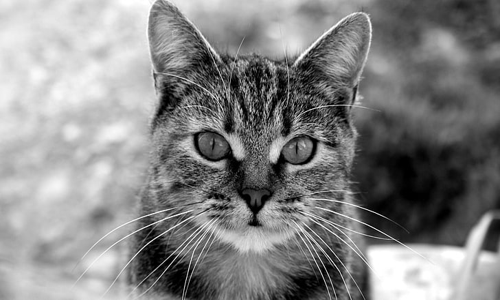

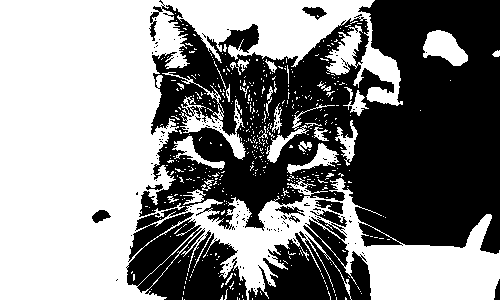

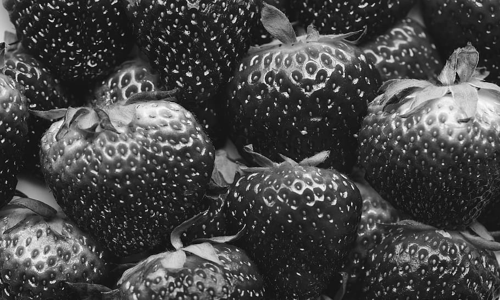

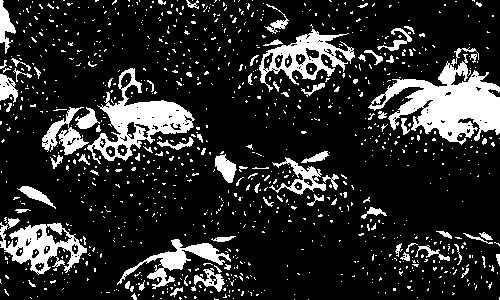

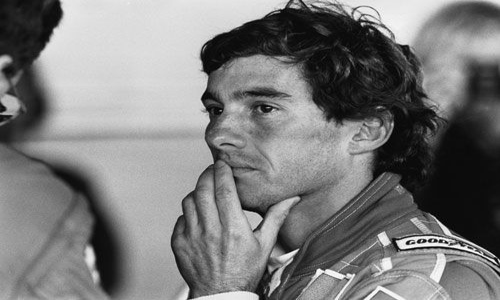

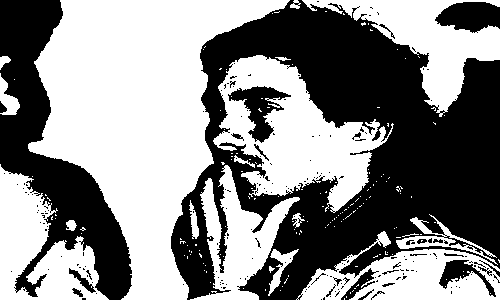

In [79]:
# Valores para a, b e s
a = 80 / 255.0
b = 120 / 255.0
s = 200 / 255.0

# Aplica a alteração nos pixels específicos
imagem_alteracao_pixel_1 = alteracao_pixel_especifico(imagem_1, a, b, s)
exibir_comparacao(imagem_1, imagem_alteracao_pixel_1, titulo_original, titulo_transformada)
imagem_alteracao_pixel_2 = alteracao_pixel_especifico(imagem_2, a, b, s)
exibir_comparacao(imagem_2, imagem_alteracao_pixel_2, titulo_original, titulo_transformada)
imagem_alteracao_pixel_3 = alteracao_pixel_especifico(imagem_3, a, b, s)
exibir_comparacao(imagem_3, imagem_alteracao_pixel_3, titulo_original, titulo_transformada)